In [91]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# show all columns pandas
pd.set_option('display.max_columns', None)


In [5]:
# load table activities from strava.db into pandas dataframe df
conn = sqlite3.connect('strava.db')
df = pd.read_sql_query("SELECT * FROM activity_details", conn)
conn.close()


In [89]:
# load activity tables into pandas dataframe df_activities
conn = sqlite3.connect('strava.db')
df_activities = pd.read_sql_query("SELECT * FROM activities", conn)
conn.close()

In [96]:
cond = df_activities.type == "VirtualRide"
activities_filter = df_activities[cond].activity_id.unique().tolist()

In [111]:
cond = df.activity_id == 8031217762
test = df[cond].copy()
test = test.dropna(subset=["watts"])

cond = df.activity_id.isin(activities_filter)
test = df[cond].copy()
test = test.dropna(subset=["watts", "heartrate"], how="any")

In [8]:
# import hmmlearn library
from hmmlearn import hmm

In [25]:
test.head(2)

,activity_id,time,watts,heartrate,distance,velocity_smooth,altitude,cadence,state
26268,8031217762,0,NaN,103.0,0.0,0.0,NaN,55.0,1
26269,8031217762,1,184.0,103.0,2.1,0.0,NaN,55.0,1


In [144]:
model = hmm.GaussianHMM(n_components=4)#, covariance_type="full", n_iter=1000)
model.fit(test[['time', 'watts', 'heartrate']])

GaussianHMM(n_components=4)

In [145]:
test["state"] = model.predict(test[['time', 'watts', 'heartrate']])

In [146]:
test.activity_id.unique()

array([7134923606, 7134785420, 7119038757, 7091688058, 7058804450,
       7048727839, 7038104973, 7029385134, 7016946176, 7006753764,
       6948798585, 6939339059, 6929503808, 6906011967, 6905739395,
       6869130183, 6858713805, 6753168008, 6735365989, 6722790718,
       6700773253, 6686314613, 6671882541, 6660612534, 6649755541,
       6629409994, 6616203935, 6366509039, 6314126019, 6296303616,
       6274773124, 6265053094, 6258531549, 6242477901, 6238027111,
       6228837328, 6210252818, 6202977850, 6111390724, 6103753599,
       6068476085, 6047203998, 5798913062, 5399536863, 5346815072,
       5333401378, 5269621743, 5252470828, 5176786777, 4989799678,
       4947512870, 4934583451, 4700500309, 4605450803, 4578037746,
       4565015048, 4508420126, 4500096974, 4484877831, 4076805949,
       4076809621, 4057964600, 3466480442, 3431691895, 3418305919,
       3379261884, 3357980775, 3249280497, 3241849794, 3126326839,
       3086063316, 3065631046, 3045837646, 3025153587, 3004307

In [147]:
(test.activity_id == 8031217762).sum()

0

Wahoo SYSTM: Do As You're Told


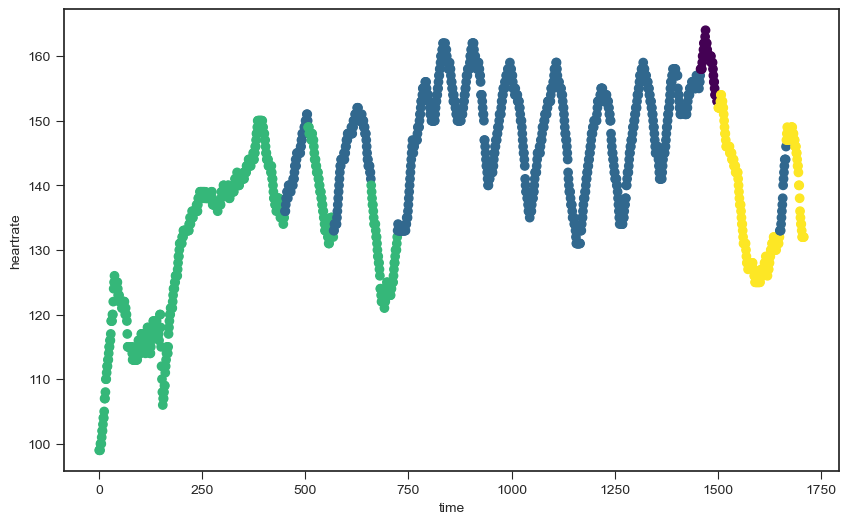

In [148]:
# plot time and heartrate and color by state
act_filter = 7134785420
cond = test.activity_id == act_filter
data = test[cond].copy()
cond = df_activities.activity_id == act_filter
print(df_activities[cond].name.values[0])
plt.figure(figsize=(10, 6))
plt.scatter(data.time, data.heartrate, c=data.state, cmap='viridis')
plt.xlabel('time')
plt.ylabel('heartrate')
plt.show()


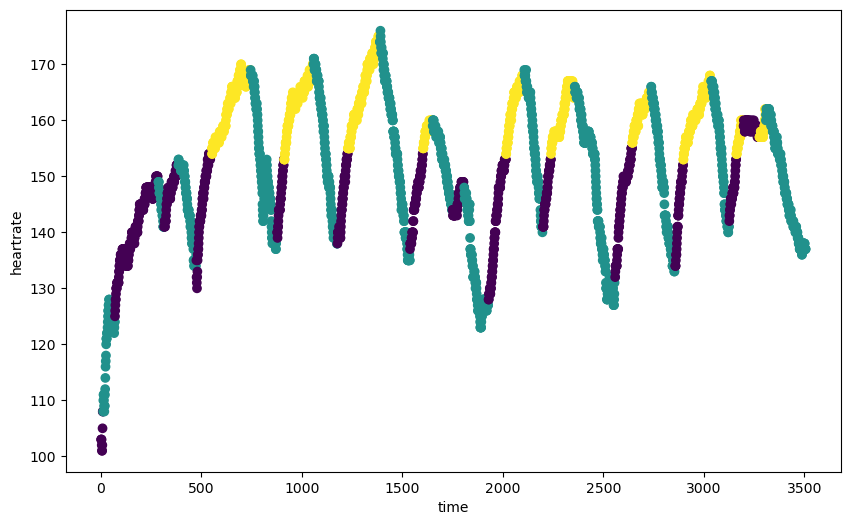

In [47]:
# plot time and heartrate and color by state
plt.figure(figsize=(10, 6))
plt.scatter(test.time, test.heartrate, c=test.state, cmap='viridis')
plt.xlabel('time')
plt.ylabel('heartrate')
plt.show()


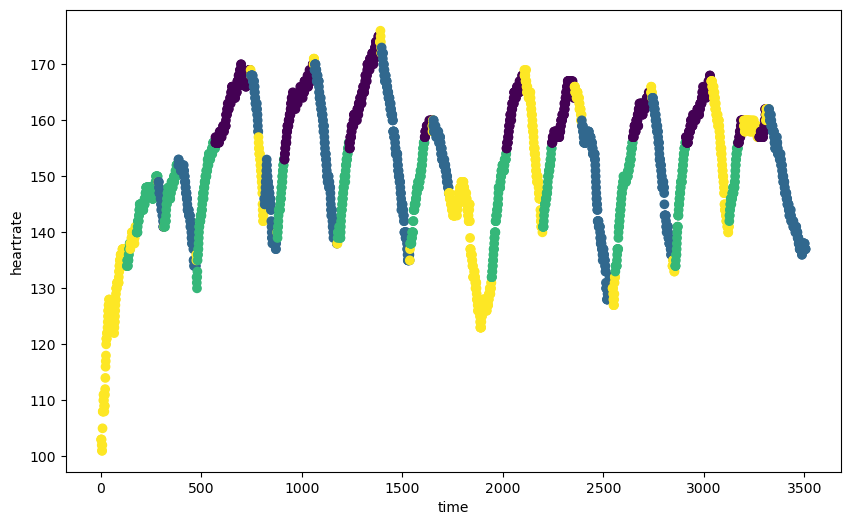

In [53]:
# plot time and heartrate and color by state
plt.figure(figsize=(10, 6))
plt.scatter(test.time, test.heartrate, c=test.state, cmap='viridis')
plt.xlabel('time')
plt.ylabel('heartrate')
plt.show()


In [55]:
from pyhhmm.gaussian import GaussianHMM

In [68]:
test[['watts', 'heartrate']].values#.shape

array([[184., 103.],
       [173., 103.],
       [170., 103.],
       ...,
       [112., 137.],
       [113., 137.],
       [113., 137.]])

In [88]:
model = GaussianHMM(n_states=4, n_emissions=2)
model.train([np.array(test[['watts', 'heartrate']].values)])

(<pyhhmm.gaussian.GaussianHMM at 0x24d3cbf0f70>, -28902.24247068991)

In [85]:
test["state2"] = model.predict([test[['watts', 'heartrate']].values])[0]

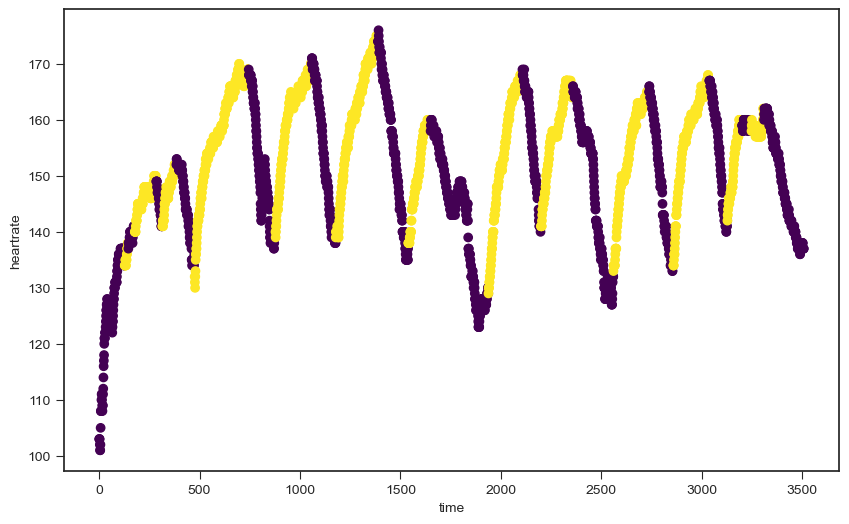

In [80]:
# plot time and heartrate and color by state
plt.figure(figsize=(10, 6))
plt.scatter(test.time, test.heartrate, c=test.state2, cmap='viridis')
plt.xlabel('time')
plt.ylabel('heartrate')
plt.show()


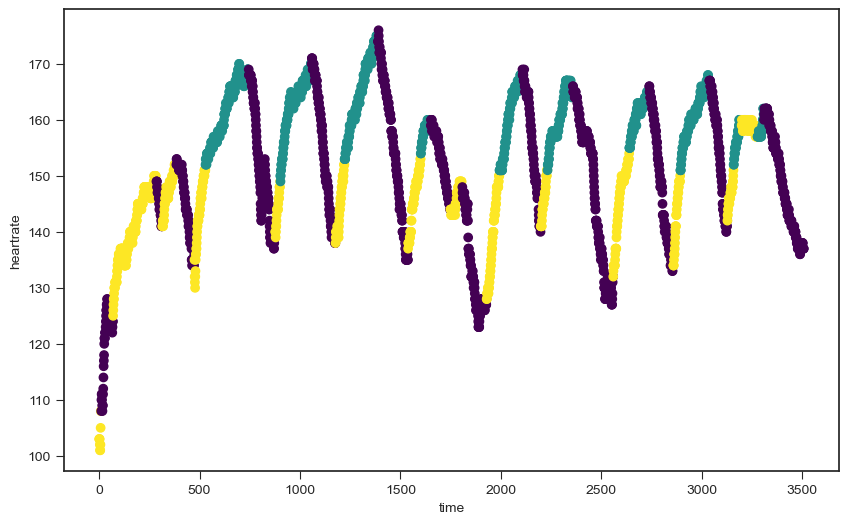

In [83]:
# plot time and heartrate and color by state
plt.figure(figsize=(10, 6))
plt.scatter(test.time, test.heartrate, c=test.state2, cmap='viridis')
plt.xlabel('time')
plt.ylabel('heartrate')
plt.show()


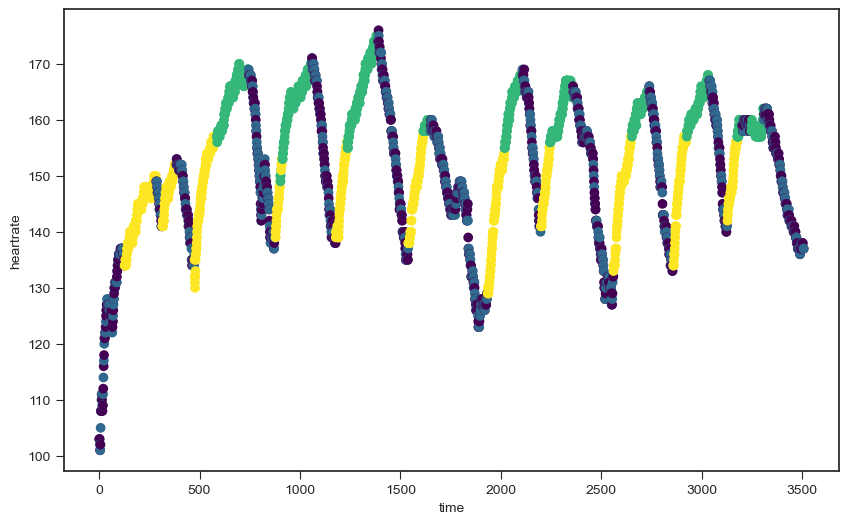

In [86]:
# plot time and heartrate and color by state
plt.figure(figsize=(10, 6))
plt.scatter(test.time, test.heartrate, c=test.state2, cmap='viridis')
plt.xlabel('time')
plt.ylabel('heartrate')
plt.show()
